In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('movies.csv')

In [3]:
data.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [4]:
data.describe(include='all')

movieId                     title genres
count    10329.000000                     10329  10329
unique            NaN                     10327    938
top               NaN  War of the Worlds (2005)  Drama
freq              NaN                         2   1385
mean     31924.282893                       NaN    NaN
std      37734.741149                       NaN    NaN
min          1.000000                       NaN    NaN
25%       3240.000000                       NaN    NaN
50%       7088.000000                       NaN    NaN
75%      59900.000000                       NaN    NaN
max     149532.000000                       NaN    NaN

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [6]:
data_rating = pd.read_csv('ratings.csv')

In [7]:
data_rating.head()

userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523

In [8]:
data_rating.describe(include='all')

userId        movieId         rating     timestamp
count  105339.000000  105339.000000  105339.000000  1.053390e+05
mean      364.924539   13381.312477       3.516850  1.130424e+09
std       197.486905   26170.456869       1.044872  1.802660e+08
min         1.000000       1.000000       0.500000  8.285650e+08
25%       192.000000    1073.000000       3.000000  9.711008e+08
50%       383.000000    2497.000000       3.500000  1.115154e+09
75%       557.000000    5991.000000       4.000000  1.275496e+09
max       668.000000  149532.000000       5.000000  1.452405e+09

In [9]:
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [10]:
len(data.movieId.unique())

10329

In [11]:
len(data_rating.movieId.unique())

10325

In [12]:
#data=data[data.movieId.isin(data_rating)]

In [13]:
#len(data.movieId.unique())

In [14]:
data1=pd.merge(data, data_rating, how ='left', on ='movieId')

In [15]:
data1.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating     timestamp  
0     2.0     5.0  8.590469e+08  
1     5.0     4.0  1.303501e+09  
2     8.0     5.0  8.586109e+08  
3    11.0     4.0  8.508158e+08  
4    14.0     4.0  8.517663e+08

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105343 entries, 0 to 105342
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105343 non-null  int64  
 1   title      105343 non-null  object 
 2   genres     105343 non-null  object 
 3   userId     105339 non-null  float64
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 5.6+ MB


In [17]:
data1['genres']= data1['genres'].str.replace('|',' ')

In [18]:
data1.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure Animation Children Comedy Fantasy   
1        1  Toy Story (1995)  Adventure Animation Children Comedy Fantasy   
2        1  Toy Story (1995)  Adventure Animation Children Comedy Fantasy   
3        1  Toy Story (1995)  Adventure Animation Children Comedy Fantasy   
4        1  Toy Story (1995)  Adventure Animation Children Comedy Fantasy   

   userId  rating     timestamp  
0     2.0     5.0  8.590469e+08  
1     5.0     4.0  1.303501e+09  
2     8.0     5.0  8.586109e+08  
3    11.0     4.0  8.508158e+08  
4    14.0     4.0  8.517663e+08

In [19]:
data1.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

In [20]:
data1.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Being Human (1993)                   5.0
Three Ages (1923)                    5.0
The Liberator (2013)                 5.0
October Baby (2011)                  5.0
Resident Evil: Retribution (2012)    5.0
Name: rating, dtype: float64

In [21]:
data1.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [22]:
ratings_mean_count = pd.DataFrame(data1.groupby('title')['rating'].mean())

In [23]:
ratings_mean_count['rating_counts'] = pd.DataFrame(data1.groupby('title')['rating'].count())

In [24]:
ratings_mean_count.head()

rating  rating_counts
title                                                         
'71 (2014)                                3.500              1
'Hellboy': The Seeds of Creation (2004)   3.000              1
'Round Midnight (1986)                    2.500              1
'Til There Was You (1997)                 4.000              3
'burbs, The (1989)                        3.125             20

<AxesSubplot:>

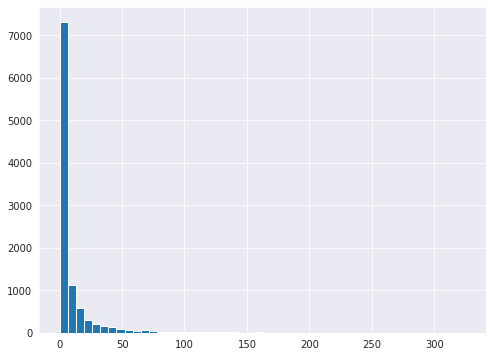

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<AxesSubplot:>

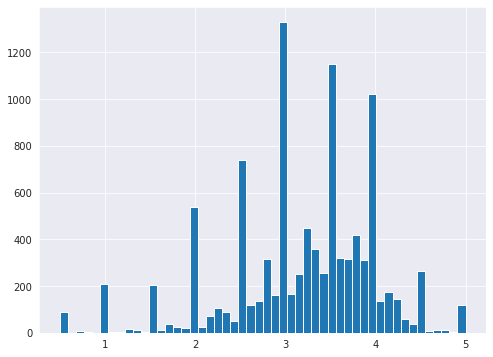

In [26]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# Vectorizing pre-processed movie plots using TF-IDF 
tfidfvec = TfidfVectorizer(stop_words='english') 
tfidf_movieid = tfidfvec.fit_transform((data1["genres"]))
tf_df=pd.DataFrame(tfidf_movieid.toarray(), index=data1.index.tolist())


print(tf_df.shape)

# Finding cosine similarity between vectors genres
#from sklearn.metrics.pairwise import cosine_similarity 
#cos_sim = cosine_similarity(tfidf_movieid, tfidf_movieid) 

(105343, 23)


In [31]:
tf_df.head()

0         1         2         3         4    5    6    7         8    9   \
0  0.0  0.360507  0.554106  0.510399  0.288893  0.0  0.0  0.0  0.468011  0.0   
1  0.0  0.360507  0.554106  0.510399  0.288893  0.0  0.0  0.0  0.468011  0.0   
2  0.0  0.360507  0.554106  0.510399  0.288893  0.0  0.0  0.0  0.468011  0.0   
3  0.0  0.360507  0.554106  0.510399  0.288893  0.0  0.0  0.0  0.468011  0.0   
4  0.0  0.360507  0.554106  0.510399  0.288893  0.0  0.0  0.0  0.468011  0.0   

   ...   13   14   15   16   17   18   19   20   21   22  
0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 23 columns]

In [36]:
from sklearn.decomposition import TruncatedSVD

In [43]:
svd = TruncatedSVD(n_components=22)

In [44]:
matrix=svd.fit_transform(tf_df)

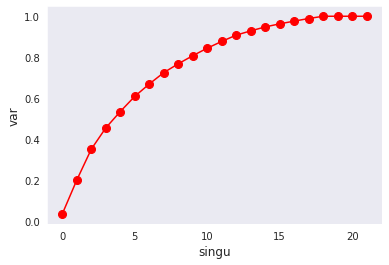

In [45]:
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms=16,color='red')
plt.xlabel('singu', fontsize=12)
plt.ylabel('var', fontsize=12)
plt.show()

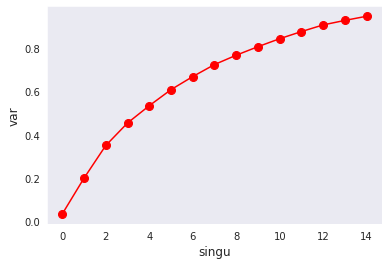

In [46]:
svd = TruncatedSVD(n_components=15)
matrix=svd.fit_transform(tf_df)
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms=16,color='red')
plt.xlabel('singu', fontsize=12)
plt.ylabel('var', fontsize=12)
plt.show()

In [49]:
# Finding cosine similarity between vectors genres
from sklearn.metrics.pairwise import cosine_similarity 
cos_sim = cosine_similarity(tf_df, tf_df) 

MemoryError: Unable to allocate 82.7 GiB for an array with shape (105343, 105343) and data type float64